# PROYECTO DE MACHINE LEARNING - REGRESIÓN
En este cuaderno se desarrollará un proyecto de regresión utilizando Python, se incluye cada paso del proceso de Machine Learning aplicado al problema.

In [1]:
#Importar las librerias
import pandas as pd 
import matplotlib.pyplot as pit

### CARGAR EL CONJUNTO DE DATOS
Para esta practica se tomará el conjunto de datos de publicidad, se puede encontrar en la página de [Kaggle.com](https://www.kaggle.com/) como “[Advertising Data](https://www.kaggle.com/purbar/advertising-data?select=Advertising.csv)” 

In [2]:
#Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/Classroom/21B-Ing del Conocimiento ITICS/Advertising.csv')

### Entender los datos
El siguiente paso en el desarrollo de un proyecto de Machine Learning es el de entender los datos con lo se cuenta. Para este
paso se utilizan varias funciones que se tiene disponible en la librería *pandas*

In [3]:
#Mostrar la cabezara de los datos
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Mostrat la dimesion de los datos
data.shape

(200, 5)

In [5]:
#Mostrar los tipos de datos con lo que trabajamos
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

### Visualizar los datos
Una vez que se haya entendido los datos de manera numérica ahora se analizará de manera visual utilizando la librería matplotlib.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8032b8190>,
      dtype=object)

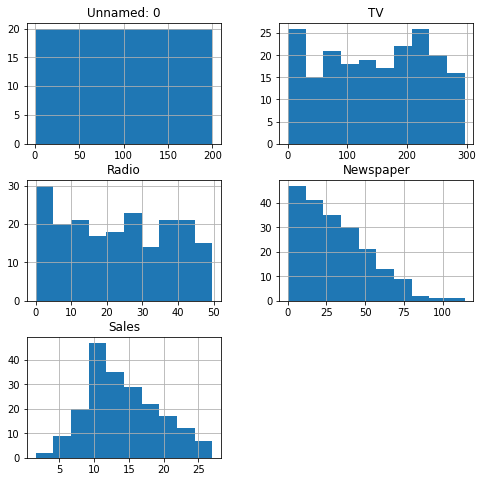

In [6]:
#Visualizando los datos
data.hist(figsize=(8,8))

### SEPARACIÓN DE LOS DATOS
Conociendo el conjunto de datos que se está trabajando dentro del proyecto, se procede a realizar la separación de los datos en dos conjuntos, el primero de variables independientes, ***X***, y un segundo conjunto de variable dependientes, ***y***.

*La primera columna se elimina porque contiene la numeración de los filas, información que no influye para el análisis de
Machine Learning. Eso correspondera a **X**.*

*Seguidamente se define los variables correspondientes a **y**, o variable dependiente, que vendría siendo la última columna del
conjunto de datos.*

In [7]:
#Seperando la primera columna del conjunto de datos a trabajar 
x = data.iloc[:, 1:-1].values
print(x)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [8]:
#Asignando valor a y
y = data.iloc[:, -1].values
print(y)

[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6  8.6 17.4  9.2  9.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9
 18.9 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6
 21.7 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5
 25.4 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8
 14.1 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6
  6.6  8.8 24.7  9.7  1.6 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.6 10.3 17.3 15.9  6.7 10.8  9.9  5.9 19.6 17.3  7.6
  9.7 1

*Se llega al último paso antes de implementar los algoritmos de Machine Learning, este es el correspondiente al de separar
los datos en **entrenamiento** y **prueba**, para esto se utiliza la función train_test_split de la librería scikit-learn*

In [9]:
#Importar libreria
from sklearn.model_selection import train_test_split

In [10]:
#Separacion de datos de prueba y entrenamiento 
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.25, random_state = 0)

### APLICACIÓN DE ALGORITMOS DE REGRESIÓN
Se implementarán los algoritmos vistos con anterioridad y se evaluará los resultados con respecto al error del algoritmo 

### Regresión Lineal

In [11]:
#Regresión Lineal
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

print("Datos de entrenamiento")
print(y_test)
print("")
print("Datos obtenidos en la prediccion")
print(y_pred)

Datos de entrenamiento
[12.4 19.7 17.6 15.5 10.1  9.7 21.4 14.4 16.6  5.5 12.7 11.7 12.2 14.6
 19.  19.4 20.2 18.  10.7 12.  20.7 11.2 20.8 23.8 11.4 16.7 19.8 19.
 15.9 19.2 17.3 10.6  9.6  7.6  5.3 15.7  9.3 18.4  9.5 12.8 12.9  8.6
 17.3 11.   9.7 11.8 27.   6.6 22.2 14.1  7.3  9.9 11.4 22.1 11.5 13.4
 16.9 18.  12.2 17.1 22.3  9.7 14.8 15.2  9.7 13.3 15.5 10.3 11.6 18.
 22.4  5.3 20.7 22.6 11.7  6.9 18.5 12.2 11.9 25.5 11.8 18.9 21.7  7.
  3.2 14.5 15.3  7.3 13.4 17.4  6.6 14.8 12.8 13.2  9.3 10.4 15.5 14.9
 20.7 19.2  5.7 11.7 24.4 10.1 19.6 21.2 10.1 24.7  9.5 18.9 14.6 11.6
 11.9  8.   8.8 20.2  9.6 20.1 15.  25.4 10.5 17.2 11.3 11.  12.6 10.9
 19.6  8.8 14.2 12.  11.9 12.3 15.9 11.5 10.8 21.5 23.8 10.9 12.9 18.3
 16.  25.4 12.5 10.6 14.7 13.4  5.9  9.4 23.2  7.6]

Datos obtenidos en la prediccion
[10.85006568 19.78803217 19.1253368  15.57197573  9.23053805  8.13413942
 22.20823857 14.56398958 16.7038249   7.80782542 17.02611064 13.51170348
 14.9646612  14.09786053 17.76375588 1

In [12]:
#La métrica a evaluar será el "error cuadrático medio", para ello primero se importará la librería y posteriormente la función.
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
#error cuadrático medio de Regresión Lineal
error = sqrt(mean_squared_error(y_test,y_pred))
print(error)

1.786371209258764


### Árboles de Decisión 


In [14]:
#Árboles de Decisión 
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_train,y_train)
y_pred = modelo.predict(x_test)

print("Datos de entrenamiento")
print(y_test)
print("")
print("Datos de la prediccion")
print(y_pred)

Datos de entrenamiento
[12.4 19.7 17.6 15.5 10.1  9.7 21.4 14.4 16.6  5.5 12.7 11.7 12.2 14.6
 19.  19.4 20.2 18.  10.7 12.  20.7 11.2 20.8 23.8 11.4 16.7 19.8 19.
 15.9 19.2 17.3 10.6  9.6  7.6  5.3 15.7  9.3 18.4  9.5 12.8 12.9  8.6
 17.3 11.   9.7 11.8 27.   6.6 22.2 14.1  7.3  9.9 11.4 22.1 11.5 13.4
 16.9 18.  12.2 17.1 22.3  9.7 14.8 15.2  9.7 13.3 15.5 10.3 11.6 18.
 22.4  5.3 20.7 22.6 11.7  6.9 18.5 12.2 11.9 25.5 11.8 18.9 21.7  7.
  3.2 14.5 15.3  7.3 13.4 17.4  6.6 14.8 12.8 13.2  9.3 10.4 15.5 14.9
 20.7 19.2  5.7 11.7 24.4 10.1 19.6 21.2 10.1 24.7  9.5 18.9 14.6 11.6
 11.9  8.   8.8 20.2  9.6 20.1 15.  25.4 10.5 17.2 11.3 11.  12.6 10.9
 19.6  8.8 14.2 12.  11.9 12.3 15.9 11.5 10.8 21.5 23.8 10.9 12.9 18.3
 16.  25.4 12.5 10.6 14.7 13.4  5.9  9.4 23.2  7.6]

Datos de la prediccion
[12.9 23.7 17.4 16.6  8.5  9.7 17.4 12.9 16.6  4.8 11.6 13.2 11.6 15.
 15.9 23.7 17.4 15.9 11.3 11.8 22.6 10.5 17.4 26.2 10.6 14.7 17.4 24.2
 16.1 23.7 16.6 10.6  8.5  8.4  5.6 16.1  6.7 15.6 10

In [15]:
#error cuadrático medio de Árboles de Decisión
error = sqrt(mean_squared_error(y_test,y_pred))
print(error)

1.7042495904845238


### Bosques Aleatorios 

In [16]:
#Bosques Aleatorios
from sklearn.ensemble import  RandomForestRegressor

modelo = RandomForestRegressor()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

print("Datos de entrenamiento")
print(y_test)
print("")
print("Datos de la prediccion")
print(y_pred)

Datos de entrenamiento
[12.4 19.7 17.6 15.5 10.1  9.7 21.4 14.4 16.6  5.5 12.7 11.7 12.2 14.6
 19.  19.4 20.2 18.  10.7 12.  20.7 11.2 20.8 23.8 11.4 16.7 19.8 19.
 15.9 19.2 17.3 10.6  9.6  7.6  5.3 15.7  9.3 18.4  9.5 12.8 12.9  8.6
 17.3 11.   9.7 11.8 27.   6.6 22.2 14.1  7.3  9.9 11.4 22.1 11.5 13.4
 16.9 18.  12.2 17.1 22.3  9.7 14.8 15.2  9.7 13.3 15.5 10.3 11.6 18.
 22.4  5.3 20.7 22.6 11.7  6.9 18.5 12.2 11.9 25.5 11.8 18.9 21.7  7.
  3.2 14.5 15.3  7.3 13.4 17.4  6.6 14.8 12.8 13.2  9.3 10.4 15.5 14.9
 20.7 19.2  5.7 11.7 24.4 10.1 19.6 21.2 10.1 24.7  9.5 18.9 14.6 11.6
 11.9  8.   8.8 20.2  9.6 20.1 15.  25.4 10.5 17.2 11.3 11.  12.6 10.9
 19.6  8.8 14.2 12.  11.9 12.3 15.9 11.5 10.8 21.5 23.8 10.9 12.9 18.3
 16.  25.4 12.5 10.6 14.7 13.4  5.9  9.4 23.2  7.6]

Datos de la prediccion
[11.67  19.891 16.879 15.387  9.305  9.688 17.321 13.385 16.626  6.296
 13.899 12.774 13.475 13.887 16.333 21.311 16.857 15.336 11.196 12.268
 19.903 10.661 17.25  24.072 11.179 15.239 16.887 19

In [17]:
#error cuadrático de Bosques Aleatorios
error = sqrt(mean_squared_error(y_test,y_pred))
print(error)

1.3584781411564917
